In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:

import dlib
from imutils import face_utils
import hpe


In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/BioID-FaceDatabase-V1.2/images/BioID_0016.pgm"

In [5]:
img  = cv2.imread(img_path)[:,:,::-1]
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


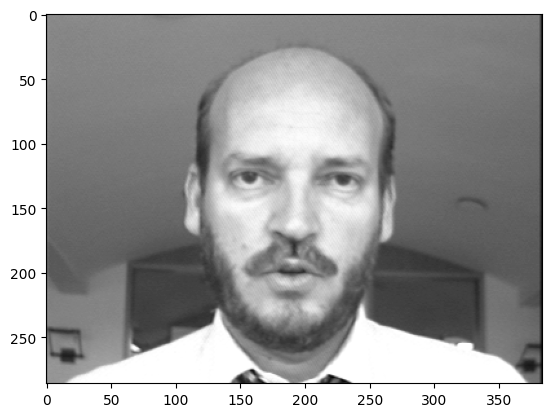

In [6]:
#Show image
plt.imshow(img,cmap="gray")

In [12]:
rects = detector(img,1)[0]

print(rects)

[(115, 81) (270, 236)]


In [13]:
def rect_to_bb(rect):
    # we will take the bounding box predicted by dlib library
    # and convert it into (x, y, w, h) where x, y are coordinates
    # and w, h are width and height

    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h) 

In [14]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((shape.num_parts, 2), dtype=dtype) #( 68,2)

	# loop over all facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, shape.num_parts):
		coords[i] = (shape.part(i).x, shape.part(i).y) # [0,0]--> (x,y)

	# return the list of (x, y)-coordinates
	return coords

In [15]:
# for i,rect in enumerate(rects):
x,y,w,h = rect_to_bb(rects)
print(x,y,w,h)


115 81 155 155


In [17]:
print(f"Width * Height:- {w *h}")

if w * h > 2000:
    shape = predictor(img,rects)
    shape_arr = shape_to_np(shape) # (68,2)
    # print(shape.num_parts) # NUmber of Location of the Face

Width * Height:- 24025


In [18]:
face_landmark_img = img.copy()

for (m,n) in shape_arr:
    cv2.circle(face_landmark_img,(m, n), 1, (0, 0, 255), -1)

In [19]:

shape_arr

array([[120, 125],
       [119, 145],
       [121, 164],
       [124, 183],
       [130, 202],
       [138, 220],
       [151, 236],
       [168, 247],
       [188, 250],
       [207, 247],
       [223, 236],
       [237, 222],
       [246, 205],
       [253, 187],
       [257, 169],
       [260, 150],
       [261, 132],
       [133, 118],
       [141, 109],
       [155, 108],
       [169, 110],
       [183, 114],
       [209, 114],
       [222, 111],
       [235, 110],
       [247, 113],
       [253, 123],
       [195, 127],
       [194, 140],
       [194, 153],
       [193, 166],
       [177, 173],
       [184, 176],
       [192, 178],
       [200, 177],
       [207, 174],
       [145, 128],
       [154, 124],
       [164, 125],
       [173, 131],
       [163, 131],
       [153, 131],
       [213, 132],
       [223, 126],
       [233, 126],
       [240, 131],
       [233, 134],
       [223, 133],
       [165, 202],
       [174, 196],
       [184, 193],
       [190, 195],
       [197,

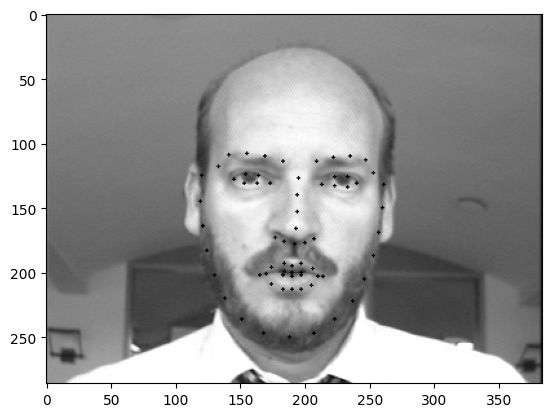

In [20]:
plt.imshow(face_landmark_img,cmap="gray")

In [95]:
def compute_rotation(shape):

    w = measurement_matrix(shape)

    r = orthogonal_iter(w[[0], :], w[[1], :], 3)

    return r

In [96]:
def measurement_matrix(shape):

    u = shape[:, [0]].T  # (1,68)
    v = shape[:, [1]].T # (1,68)

    u_mean = np.mean(u)
    u = u - u_mean

    v_mean = np.mean(v)
    v = v - v_mean

    w = np.array([u, v]).reshape(2, 68)

    # print(w, '\n')

    return w

In [113]:
# print(shape_arr[:,[0]].T.shape) 
# print(shape_arr[:,[1]])

u = shape_arr[:,[0]].T
v = shape_arr[:,[1]].T

u_mean = np.mean(u) 
print(u_mean)

u = u-u_mean


v_mean = np.mean(v)
v = v-v_mean

w = np.array([u,v]).reshape(2,68)

print(w.shape)
print(w)

191.22058823529412
(2, 68)
[[-71.22058824 -72.22058824 -70.22058824 -67.22058824 -61.22058824
  -53.22058824 -40.22058824 -23.22058824  -3.22058824  15.77941176
   31.77941176  45.77941176  54.77941176  61.77941176  65.77941176
   68.77941176  69.77941176 -58.22058824 -50.22058824 -36.22058824
  -22.22058824  -8.22058824  17.77941176  30.77941176  43.77941176
   55.77941176  61.77941176   3.77941176   2.77941176   2.77941176
    1.77941176 -14.22058824  -7.22058824   0.77941176   8.77941176
   15.77941176 -46.22058824 -37.22058824 -27.22058824 -18.22058824
  -28.22058824 -38.22058824  21.77941176  31.77941176  41.77941176
   48.77941176  41.77941176  31.77941176 -26.22058824 -17.22058824
   -7.22058824  -1.22058824   5.77941176  14.77941176  22.77941176
   13.77941176   5.77941176  -1.22058824  -8.22058824 -17.22058824
  -21.22058824  -7.22058824  -1.22058824   5.77941176  18.77941176
    5.77941176  -1.22058824  -8.22058824]
 [-44.30882353 -24.30882353  -5.30882353  13.69117647  32.69

In [134]:
# print(w[[0],:].T) #(68,1)
# # print(w) (2,68)

x = w[[0],:] # (1,68)
y = w[[1],:] # (1,68)

z = np.dot(x.T,x)+ np.dot(y.T,y) # (68,68)


print(z.shape)

(68, 68)


In [140]:
v = np.linalg.svd(z)[0] #(68,68)

print(v)
print(v.shape)

[[ 0.10602368  0.252931    0.10333882 ... -0.03209755 -0.05662577
  -0.15722863]
 [ 0.04765238  0.24898852 -0.32865826 ...  0.11826542 -0.00578932
   0.06708373]
 [-0.0068646   0.23543353  0.11816645 ...  0.05705995 -0.12050455
   0.06650562]
 ...
 [-0.09305955 -0.03109788 -0.06567419 ... -0.07220314  0.07388764
   0.06174505]
 [-0.09818272 -0.00818419 -0.01625305 ... -0.02929901 -0.07540571
   0.02295703]
 [-0.09750047  0.01545628 -0.02261912 ...  0.01755642 -0.02965008
   0.16214916]]
(68, 68)


In [143]:
qbar = v[:,0:3] # (68,3)

qbar.shape

(68, 3)

In [149]:
q = np.array([np.matmul(x,qbar),np.matmul(y,qbar)]).reshape(1,2*3) # (2,1,3) --> (1,6)
print(q.shape) # 2,1,3

print(q)

(1, 6)
[[ 3.72034260e+01 -2.97176036e+02  3.47923190e-14 -3.40440684e+02
  -3.24754566e+01  1.03678997e-14]]


In [150]:
def q_factorisation(q):

    u, sigma, vh = np.linalg.svd(q)

    r = u * np.sqrt(sigma)
    s = np.sqrt(sigma) * vh[[0], :]

    return r, s

In [153]:
l,r_hat = q_factorisation(q)
print(l)

print(r_hat)

[[-21.32111985]]
[[-1.74490957e+00  1.39381063e+01 -1.63182418e-15  1.59672985e+01
   1.52315905e+00 -4.86273694e-16]]


In [114]:
def orthogonal_iter(x, y, r):

    global zprev

    # Compute the covariance-type matrix, Z
    z = zprev + np.dot(x.T, x) + np.dot(y.T, y)

    # Compute the motion and shape components
    v = np.linalg.svd(z)[0]
    qbar = v[:, 0:r]

    # Compute the matrix containing the pose and configuration weights
    q = np.array([np.matmul(x, qbar), np.matmul(y, qbar)]).reshape(1, 2 * r)

    # Factor matrix q into the pose, r_hat, and the configuration weights, l
    l, r_hat = q_factorisation(q)

    # Extract the pose vectors
    i = r_hat[:, 0:3]
    j = r_hat[:, 3:6]

    # Impose orthonormality
    vects = np.concatenate((i, j)).T
    v_orth, sigma_orth, u_orth = np.linalg.svd(vects, full_matrices=False)
    r_orth = np.matmul(u_orth, v_orth.T)

    cross_vects = np.cross(r_orth[0, :], r_orth[1, :])
    r_orth = np.vstack([r_orth, cross_vects])

    zprev = z

    return r_orth